In [537]:
# 의사 결정 모델과 과대 적합

In [538]:
# 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [539]:
# [1] 샘플용 데이터 생성

In [540]:
X, y = make_classification(n_samples = 120, n_features = 2, n_classes = 3, n_informative = 2, n_redundant = 0, n_repeated = 0, n_clusters_per_class = 1)

In [541]:
X.shape, y.shape

((120, 2), (120,))

In [542]:
X[:5], y[:5], X[0][0], X[1][0], X[2][0]

(array([[ 0.99665202,  0.61991477],
        [ 0.83268108,  0.27845836],
        [ 1.00277081, -0.88371696],
        [ 1.51788524,  2.90904486],
        [-0.79090034, -0.2354607 ]]),
 array([2, 2, 1, 2, 1]),
 0.996652020825159,
 0.8326810820734679,
 1.002770808391176)

In [543]:
X1 = np.round(X[:, 0], 2)
X2 = np.round(X[:, 1], 2)

In [544]:
# [2] 데이터 분포

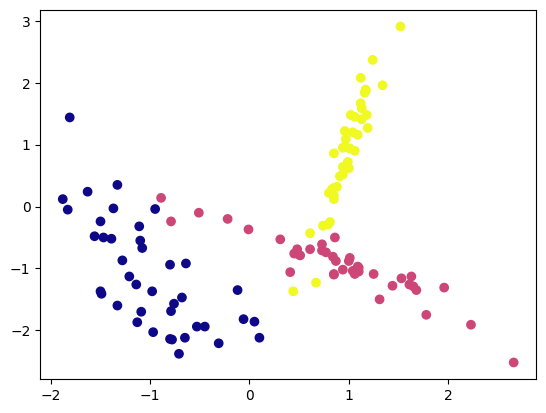

In [545]:
plt.scatter(X1, X2, c = y, cmap = 'plasma')

In [546]:
from sklearn.model_selection import train_test_split

In [547]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 11)

In [548]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((90, 2), (90,), (30, 2), (30,))

In [549]:
# 모델 생성

In [550]:
model = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 5, max_depth = 4)

In [551]:
model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10)

In [552]:
model.score(train_X, train_y)

0.9555555555555556

In [553]:
model.score(test_X, test_y)

0.9

In [554]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\1\AppData\Local\Temp\ipykernel_17072\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


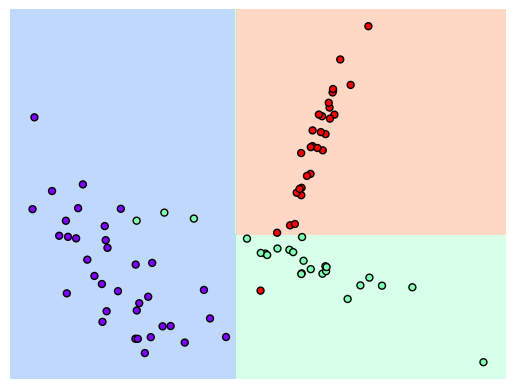

In [555]:
visualize_boundary(model, train_X, train_y)